<a href="https://colab.research.google.com/github/gmvarshini/DeutscheBank_LSTM/blob/main/Stock_Price_Analysis_and_Prediction_of_Deutsche_Bank_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Necessary Libraries

In [25]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

from IPython.display import display_html

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [27]:
df_newyork = pd.read_csv("/content/DB_NY.csv")
df_germany = pd.read_csv("/content/DBK_DE.csv")
df_france = pd.read_csv("/content/DBK_F.csv")

 
display_html(f"<h3><br/>Equity-NEW YORK-first 5 records in dataset['currency USD']", raw=True)
display(df_newyork.head(5))
display_html(f"<h3><br/>Equity-GERMANY-first 5 records in dataset['currency Euro']", raw=True)
display(df_germany.head(5))
display_html(f"<h3><br/>Equity-FRANCE-first 5 records in dataset['currency Euro']", raw=True)
display(df_france.head(5))

Equity-NEW YORK-first 5 records in dataset['currency USD']

,Date,Open,High,Low,Close,Adj Close,Volume
0,21-01-2022,12.98,13.03,12.81,12.81,12.541118,5838000
1,24-01-2022,12.29,12.45,11.95,12.43,12.169094,6630400
2,25-01-2022,12.36,12.68,12.18,12.59,12.325735,4586500
3,26-01-2022,12.94,13.31,12.79,12.94,12.668388,6210700
4,27-01-2022,13.37,13.42,13.00,13.18,12.903351,5775700


Equity-GERMANY-first 5 records in dataset['currency Euro']

,Date,Open,High,Low,Close,Adj Close,Volume
0,21-01-2022,11.550,11.618,11.332,11.478,11.236155,12526702
1,24-01-2022,11.406,11.478,10.702,10.760,10.533283,16753223
2,25-01-2022,10.940,11.086,10.764,11.074,10.840667,12594659
3,26-01-2022,11.206,11.540,11.196,11.420,11.179377,12466641
4,27-01-2022,11.450,12.116,11.394,11.920,11.668841,20304574


Equity-FRANCE-first 5 records in dataset['currency Euro']

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-01-2010,38.635372,39.432858,38.608273,39.339947,32.481987,101516
1,05-01-2010,39.231548,40.315506,39.208321,40.098717,33.108479,115482
2,06-01-2010,39.874180,40.121944,38.921848,39.548992,32.654583,53183
3,07-01-2010,39.270264,39.990318,39.123154,39.967091,32.999798,61559
4,08-01-2010,40.524555,41.407207,40.524555,40.996853,33.850048,196091


In [28]:
df_germany.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# Equity-NEW YORK

In [29]:
display_html(f"<h3><br/>Statistical Info", raw=True)
display(df_newyork.describe().style.background_gradient(cmap='Pastel2'))
display_html(f"<h3><br/>Data Type Info", raw=True)
display(df_newyork.info())

Statistical Info

,Open,High,Low,Close,Adj Close,Volume
count,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000,3288.000000
mean,26.531006,26.780780,26.240700,26.519916,23.739959,3709706.015207
std,17.334913,17.496123,17.134398,17.327147,14.277242,3363252.818763
min,5.030000,5.680000,4.990000,5.480000,5.364974,0.000000
25%,11.460000,11.560000,11.347500,11.467500,11.187500,1606798.500000
50%,18.820000,18.990000,18.665000,18.825000,17.831339,2904600.000000
75%,40.956583,41.347806,40.534351,40.954197,35.854843,4725475.000000
max,77.519081,78.406487,77.395035,77.977097,64.499596,70176200.000000


Data Type Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3288 non-null   object 
 1   Open       3288 non-null   float64
 2   High       3288 non-null   float64
 3   Low        3288 non-null   float64
 4   Close      3288 non-null   float64
 5   Adj Close  3288 non-null   float64
 6   Volume     3288 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.9+ KB


None

# Equity-GERMANY

In [30]:
display_html(f"<h3><br/>Statistical Info", raw=True)
display(df_germany.describe().style.background_gradient(cmap='Pastel2'))
display_html(f"<h3><br/>Data Type Info", raw=True)
display(df_germany.info())

Statistical Info

,Open,High,Low,Close,Adj Close,Volume
count,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000,3317.000000
mean,19.168322,19.435581,18.871185,19.153191,17.254509,11821393.615014
std,10.191341,10.309209,10.051469,10.186300,8.290787,7100444.665373
min,4.868500,5.100000,4.448500,4.871000,4.768366,0.000000
25%,10.130000,10.256000,9.950000,10.122000,9.905000,7358036.000000
50%,15.966955,16.174999,15.721516,15.940000,15.080497,10055026.000000
75%,27.904234,28.301407,27.436043,27.887209,24.652910,14199387.000000
max,46.410923,47.032326,45.944874,46.900276,38.292820,111008927.000000


Data Type Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3317 entries, 0 to 3316
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3317 non-null   object 
 1   Open       3317 non-null   float64
 2   High       3317 non-null   float64
 3   Low        3317 non-null   float64
 4   Close      3317 non-null   float64
 5   Adj Close  3317 non-null   float64
 6   Volume     3317 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 181.5+ KB


None

# Equity-FRANCE

In [31]:
display_html(f"<h3><br/>Statistical Info", raw=True)
display(df_france.describe().style.background_gradient(cmap='Pastel2'))
display_html(f"<h3><br/>Data Type Info", raw=True)
display(df_france.info())

Statistical Info

,Open,High,Low,Close,Adj Close,Volume
count,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000
mean,19.159699,19.424523,18.857682,19.140866,17.259250,97037.505882
std,10.171782,10.290507,10.035675,10.165797,8.295043,93688.637047
min,4.903000,5.070000,4.468000,4.947000,4.843431,0.000000
25%,10.156000,10.266000,9.967000,10.125000,9.901973,40921.500000
50%,15.977000,16.150000,15.728000,15.941175,15.089441,68486.000000
75%,27.833224,28.301981,27.388699,27.811096,24.643358,119253.000000
max,46.261791,46.842484,45.797241,46.710861,38.567959,1113323.000000


Data Type Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3315 entries, 0 to 3314
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3315 non-null   object 
 1   Open       3315 non-null   float64
 2   High       3315 non-null   float64
 3   Low        3315 non-null   float64
 4   Close      3315 non-null   float64
 5   Adj Close  3315 non-null   float64
 6   Volume     3315 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 181.4+ KB


None

# Data PreProcessing

As our data is timeseries, doing following data preprocessing on 3 dataset:

* Converting Date to DateTime Format using Pandas
* Sorting Date in ascending order
* Setting Date as Index

In [32]:
df_newyork['Date'] = pd.to_datetime(df_newyork['Date']).dt.date
df_germany['Date'] = pd.to_datetime(df_germany['Date']).dt.date
df_france['Date'] = pd.to_datetime(df_france['Date']).dt.date


df_newyork.sort_values(by='Date',inplace=True);df_newyork.set_index('Date',inplace=True)
df_germany.sort_values(by='Date',inplace=True);df_germany.set_index('Date',inplace=True)
df_france.sort_values(by='Date',inplace=True);df_france.set_index('Date',inplace=True)


display_html(f"<h3><br/>Equity-NEW YORK-Last 10 days['currency USD']", raw=True)
display(df_newyork.tail(10).style.background_gradient(cmap='Pastel2'))
display_html(f"<h3><br/>Equity-GERMANY-Last 10 days['currency Euro']", raw=True)
display(df_germany.tail(10).style.background_gradient(cmap='Pastel2'))
display_html(f"<h3><br/>Equity-FRANCE-Last 10 days['currency Euro']", raw=True)
display(df_france.tail(10).style.background_gradient(cmap='Pastel2'))
                            

Equity-NEW YORK-Last 10 days['currency USD']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-19,12.770000,12.820000,12.650000,12.800000,12.800000,3629900
2023-01-20,12.850000,13.040000,12.820000,13.040000,13.040000,2823700
2023-03-01,11.710000,11.790000,11.600000,11.710000,11.710000,4901900
2023-04-01,12.270000,12.550000,12.240000,12.480000,12.480000,8714500
2023-05-01,12.160000,12.180000,12.050000,12.140000,12.140000,4718300
2023-06-01,12.150000,12.440000,12.090000,12.440000,12.440000,3279200
2023-09-01,12.530000,12.650000,12.430000,12.440000,12.440000,5638700
2023-10-01,12.440000,12.650000,12.380000,12.630000,12.630000,7225000
2023-11-01,12.630000,12.680000,12.570000,12.670000,12.670000,2425800


Equity-GERMANY-Last 10 days['currency Euro']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-20,11.840000,12.086000,11.832000,11.982000,11.982000,8561500
2023-02-01,10.640000,10.996000,10.640000,10.942000,10.942000,5904673
2023-03-01,10.900000,11.138000,10.870000,11.112000,11.112000,8306776
2023-04-01,11.110000,11.740000,11.100000,11.698000,11.698000,14036108
2023-05-01,11.706000,11.710000,11.424000,11.494000,11.494000,10433214
2023-06-01,11.498000,11.624000,11.362000,11.596000,11.596000,9616404
2023-09-01,11.602000,11.764000,11.588000,11.714000,11.714000,8536936
2023-10-01,11.634000,11.708000,11.542000,11.656000,11.656000,6334552
2023-11-01,11.724000,11.812000,11.610000,11.698000,11.698000,7080438


Equity-FRANCE-Last 10 days['currency Euro']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-20,11.820000,12.064000,11.818000,11.926000,11.926000,40954
2023-02-01,10.582000,10.990000,10.542000,10.958000,10.958000,85417
2023-03-01,10.926000,11.130000,10.888000,10.984000,10.984000,22177
2023-04-01,11.120000,11.802000,11.092000,11.720000,11.720000,104454
2023-05-01,11.698000,11.712000,11.438000,11.500000,11.500000,104245
2023-06-01,11.586000,11.680000,11.374000,11.640000,11.640000,47759
2023-09-01,11.600000,11.762000,11.554000,11.554000,11.554000,40398
2023-10-01,11.610000,11.730000,11.572000,11.710000,11.710000,19246
2023-11-01,11.762000,11.804000,11.670000,11.762000,11.762000,52938


# Visualization of Adj Close and Volume

## Adj Close

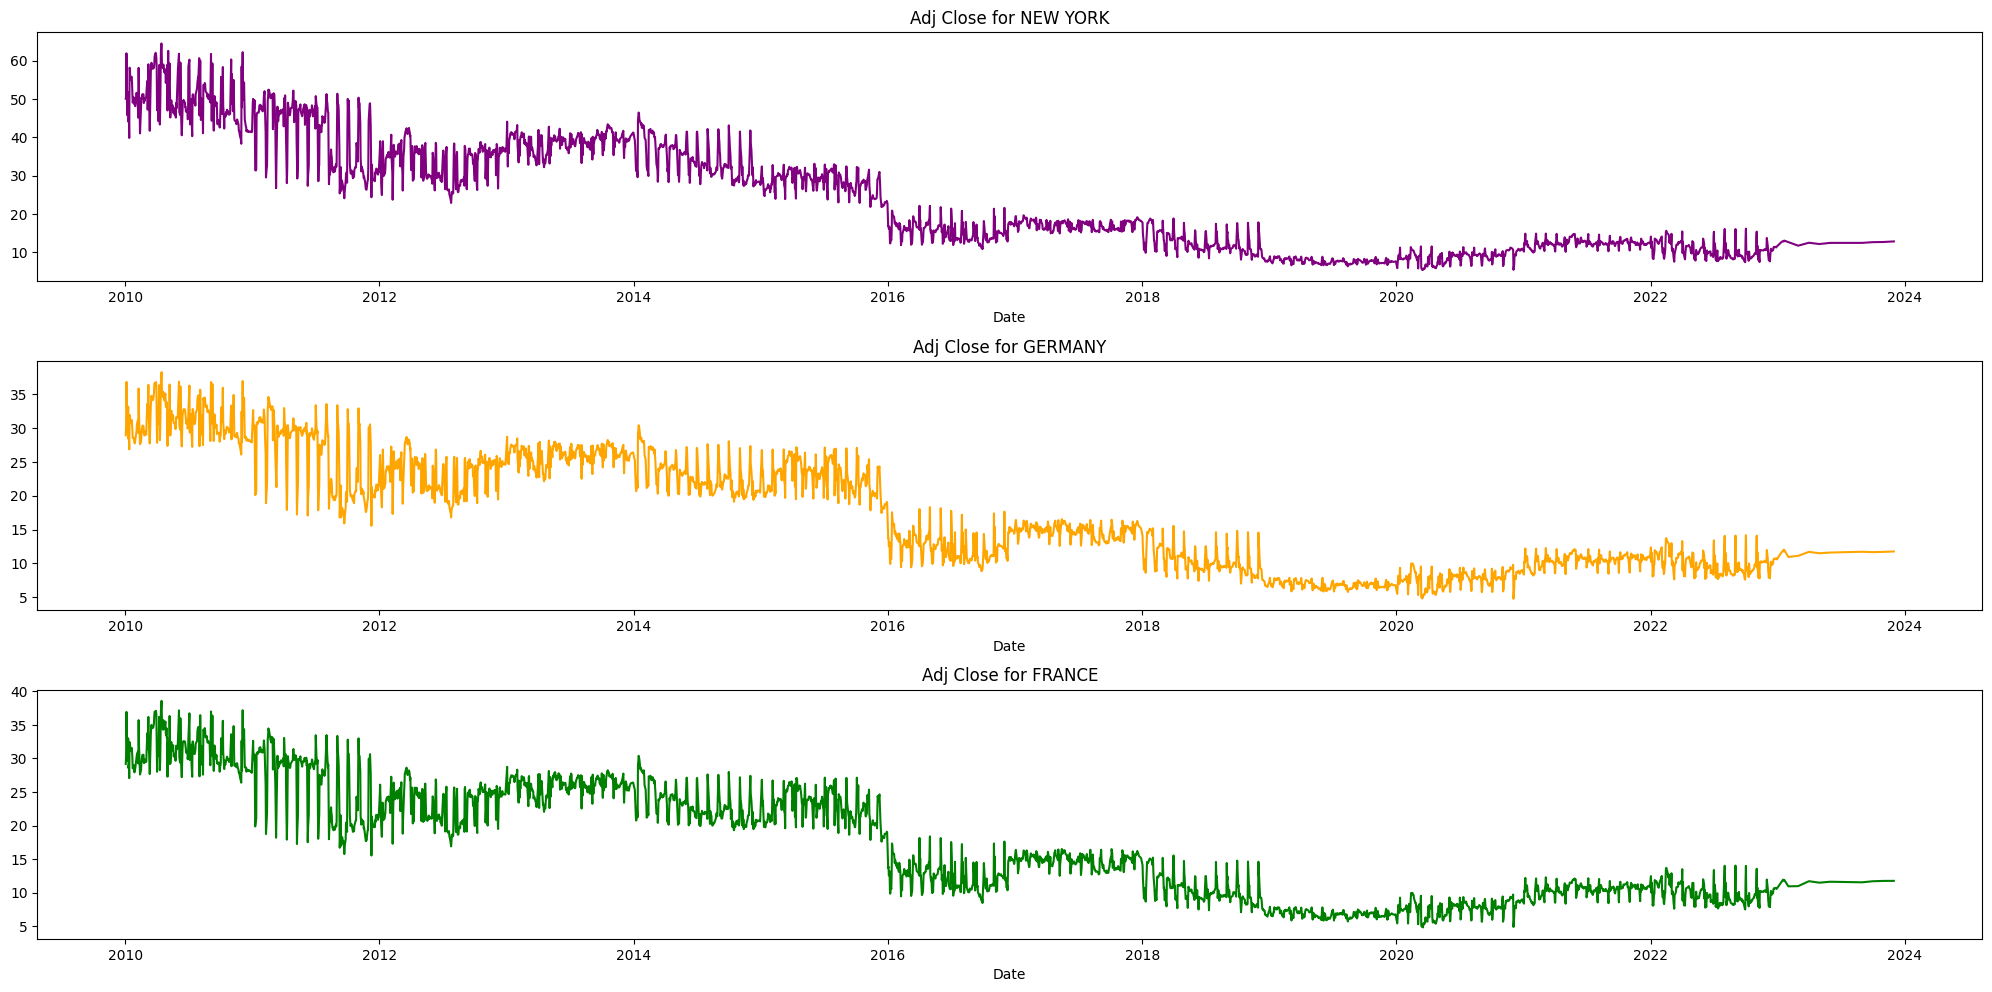

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=1)
df_newyork['Adj Close'].plot(ax=ax[0], figsize=(20,10),color='purple')
ax[0].set_title('Adj Close for NEW YORK')
df_germany['Adj Close'].plot(ax=ax[1], figsize=(20,10), color='orange')
ax[1].set_title('Adj Close for GERMANY')
df_france['Adj Close'].plot(ax=ax[2], figsize=(20,10), color='green')
ax[2].set_title('Adj Close for FRANCE')
fig.tight_layout(pad = 1)

## Volume 

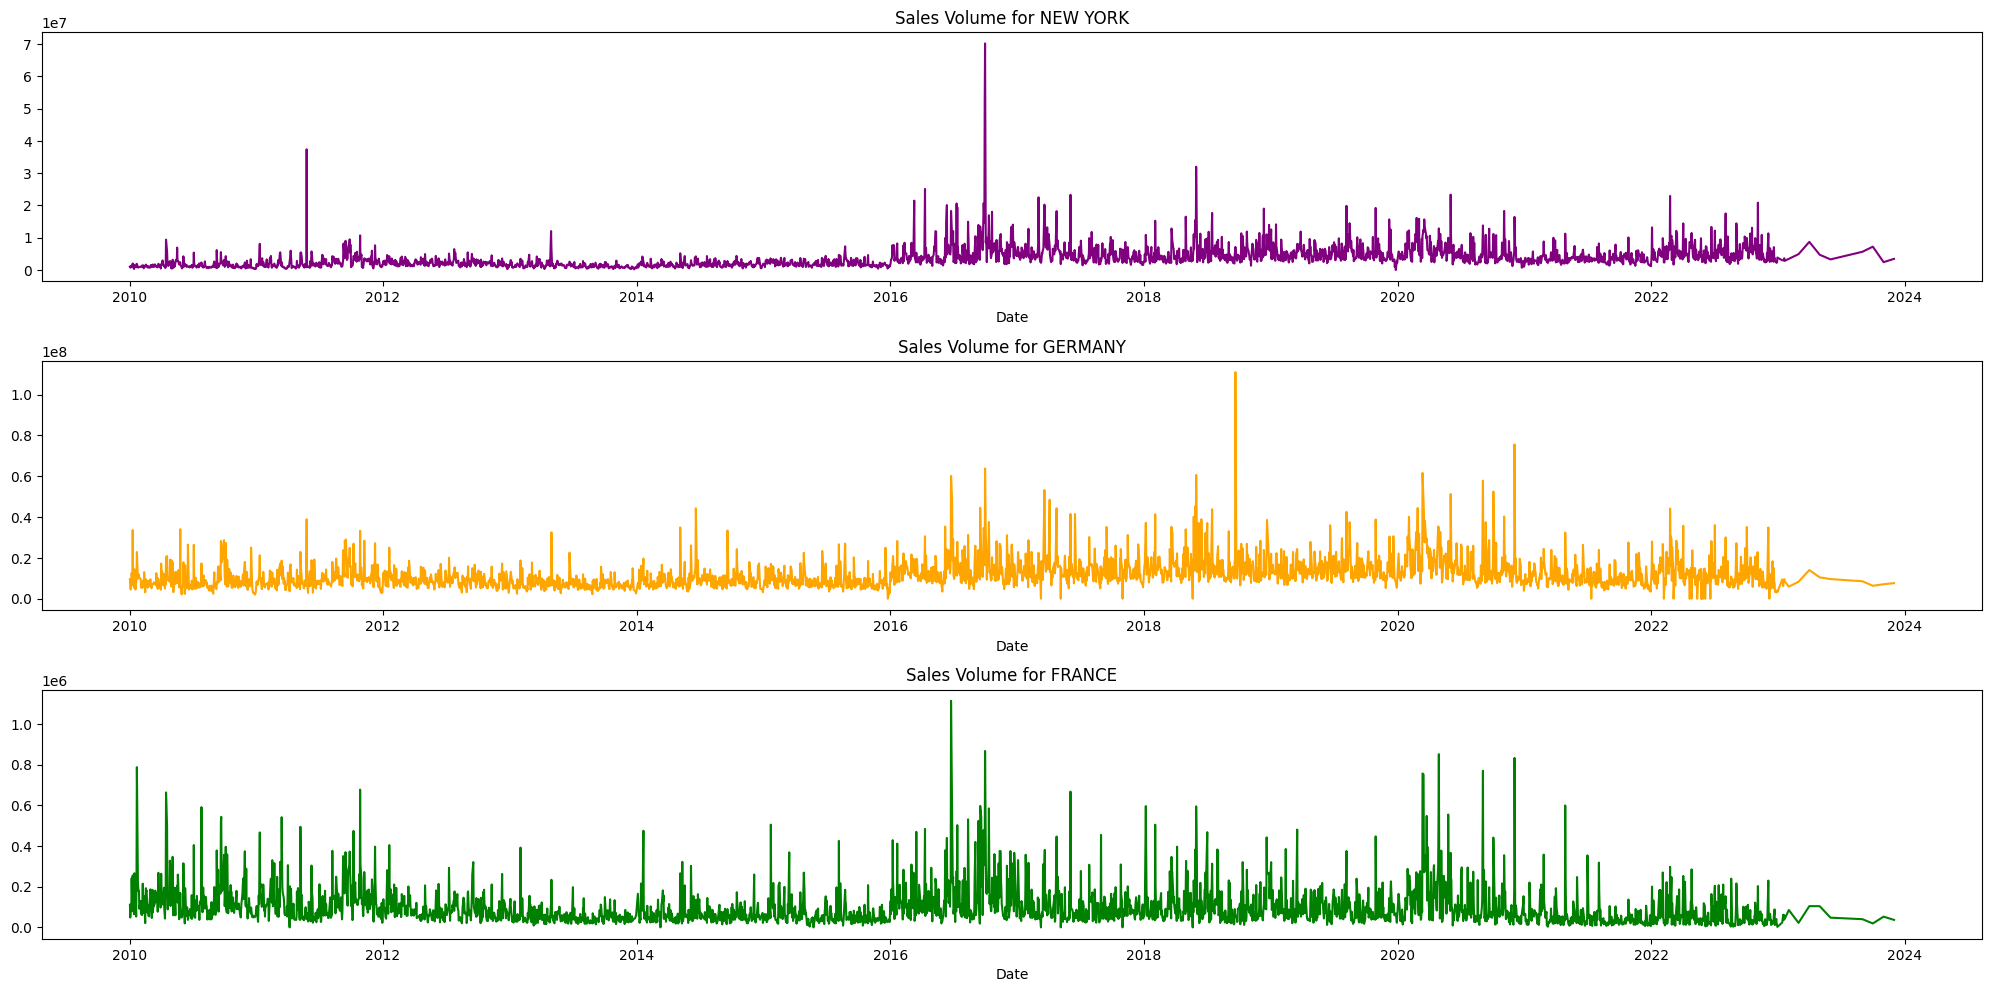

In [34]:
fig, ax = plt.subplots(nrows=3, ncols=1)
df_newyork['Volume'].plot(ax=ax[0], figsize=(20,10), color='purple')
ax[0].set_title('Sales Volume for NEW YORK')
df_germany['Volume'].plot(ax=ax[1], figsize=(20,10), color='orange')
ax[1].set_title('Sales Volume for GERMANY')
df_france['Volume'].plot(ax=ax[2], figsize=(20,10), color='Green')
ax[2].set_title('Sales Volume for FRANCE')
fig.tight_layout(pad = 1)

# Moving Average 

A trend refers to a recurring pattern in data that indicates its movement over time. To measure this, several methods are used, such as the Freehand Graphical Method, Method of Selected Points, Method of Semi-Averages, Method of Moving Averages, and Method of Least Squares.

The Method of Moving Averages is based on the principle that periodic variations at different points in time neutralize each other's effects. This method involves calculating the average of a specific number of adjoining data points or periods. By overlapping observations, it helps capture short-term fluctuations while highlighting long-term trends in time series data. Moving averages are also used in time series prediction models like ARIMA.

The Simple Moving Average (SMA) is an unweighted mean of the previous k data points. If the time series data points are p1, p2…, pn, and the mean over the last k data points is denoted as SMAk, then it can be calculated as follows.

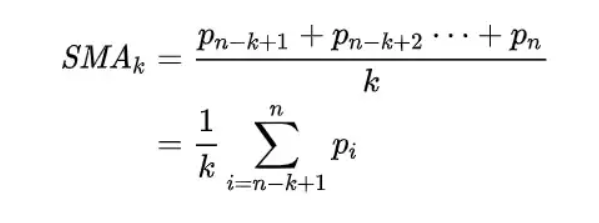

To calculate SMA for a time series, a fixed sampling width of k is used, which ranges from (n-k+1) to n. When computing SMA for the next k data points, the sampling width shifts to the range (n-k+2) to (n+1). Consequently, a new value p(n+1) is included in the calculation, and p(n-k+1) is excluded.

One way to implement SMA is by using the pandas.DataFrame.rolling() function. This function computes the moving average over a fixed window size. The general syntax for the rolling function includes specifying the window size, minimum number of periods required for calculation, centering the window, type of window, and so on.

The rolling function creates a subset of the complete series with the specified window size, which forms the first moving average. Then, the window moves forward to the next subset, and the process repeats.

In practice, Moving Averages are often calculated for different periods, such as 10, 30, and 60 days, to capture trends at different time scales.Here Moving Average is taken for 10, 30, and 60 days.

## Moving Average visualization for the entire data

In [35]:
Moving_Average = [7,30,60]

for i in Moving_Average:
    col_name = f"Moving Average for {i} days"
    df_newyork[col_name] = df_newyork['Adj Close'].rolling(i).mean()
    df_germany[col_name] = df_germany['Adj Close'].rolling(i).mean()
    df_france[col_name] = df_france['Adj Close'].rolling(i).mean()

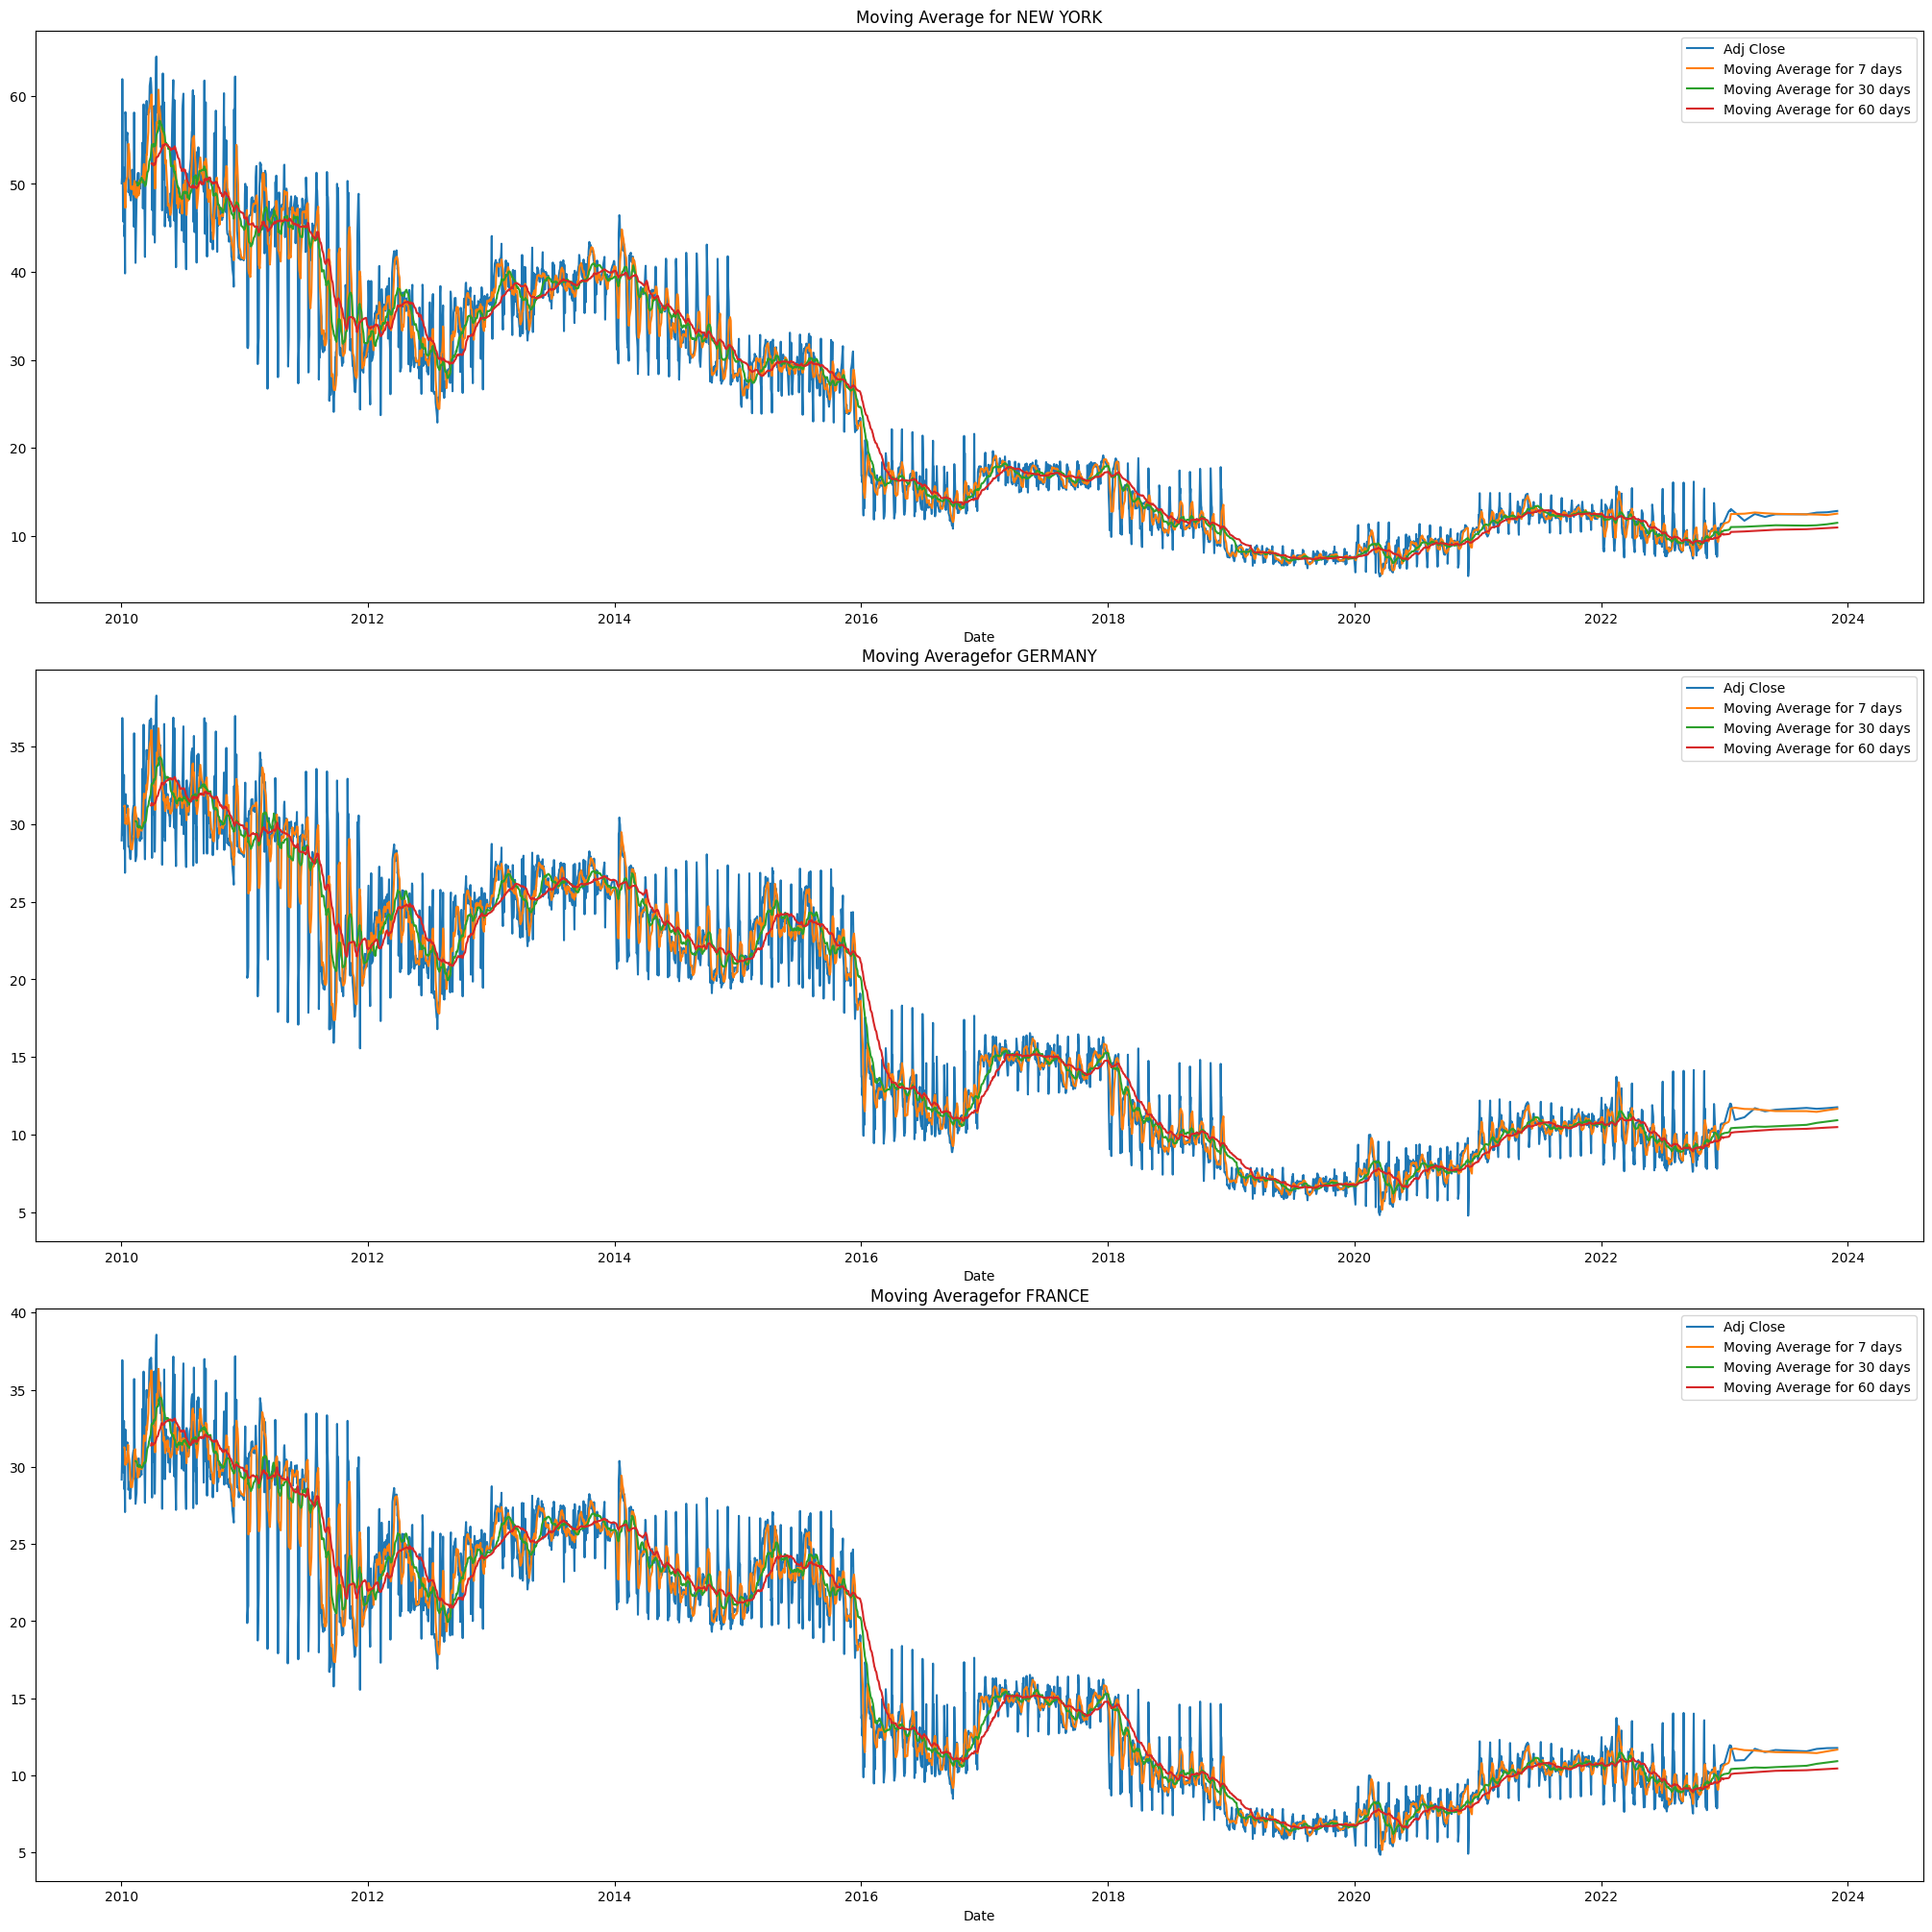

In [36]:
fig, ax = plt.subplots(nrows=3, ncols=1)
df_newyork[['Adj Close', 'Moving Average for 7 days', 'Moving Average for 30 days', 'Moving Average for 60 days']].plot(ax=ax[0],figsize=(20,20))
ax[0].set_title('Moving Average for NEW YORK')
df_germany[['Adj Close', 'Moving Average for 7 days', 'Moving Average for 30 days', 'Moving Average for 60 days']].plot(ax=ax[1],figsize=(20,20))
ax[1].set_title('Moving Averagefor GERMANY')
df_france[['Adj Close', 'Moving Average for 7 days', 'Moving Average for 30 days', 'Moving Average for 60 days']].plot(ax=ax[2],figsize=(20,20))
ax[2].set_title('Moving Averagefor FRANCE')
fig.tight_layout(pad = 0.3)

## Moving Average visualization from 1st Jan 2022 to 12th Jan 2023
(As data is available till 12th Jan)

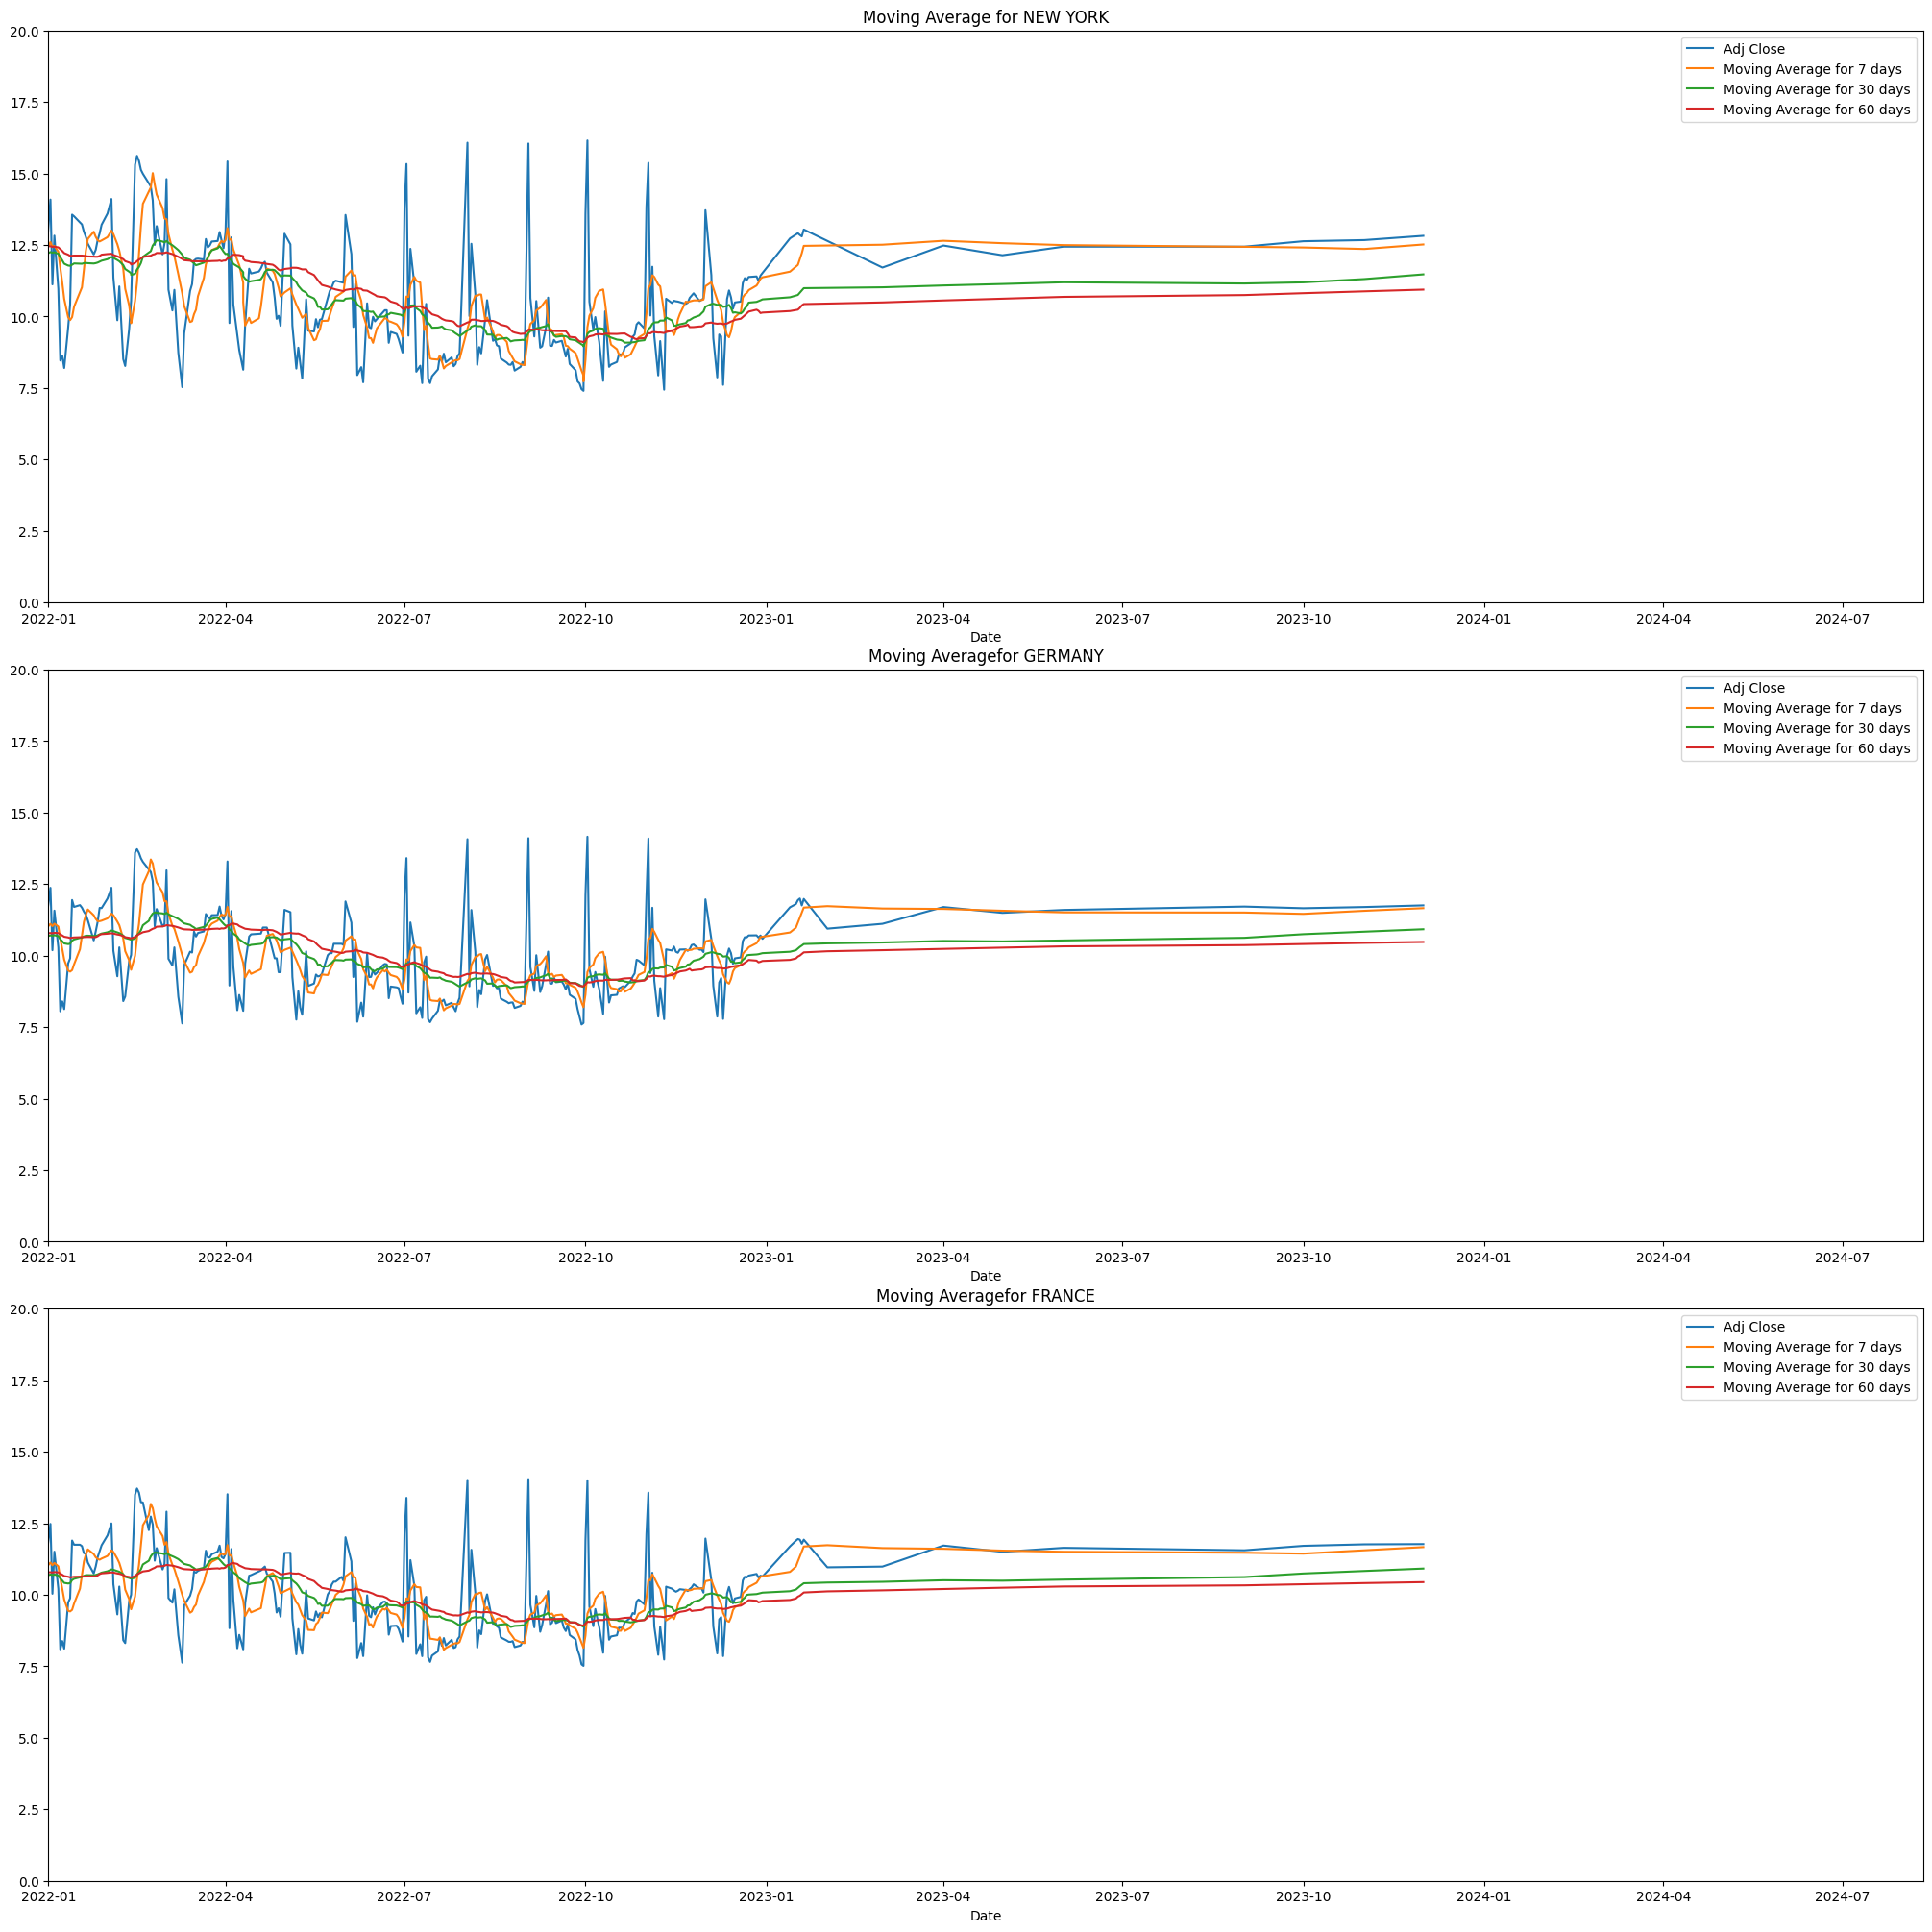

In [37]:
fig, ax = plt.subplots(nrows=3, ncols=1)
df_newyork[['Adj Close', 'Moving Average for 7 days', 'Moving Average for 30 days', 'Moving Average for 60 days']].plot(ax=ax[0],figsize=(20,20))
ax[0].set_title('Moving Average for NEW YORK');ax[0].set_xlim(pd.Timestamp('2022-01-01'));ax[0].set_ylim(0,20)
df_germany[['Adj Close', 'Moving Average for 7 days', 'Moving Average for 30 days', 'Moving Average for 60 days']].plot(ax=ax[1],figsize=(20,20))
ax[1].set_title('Moving Averagefor GERMANY');ax[1].set_xlim(pd.Timestamp('2022-01-01'));ax[1].set_ylim(0,20)
df_france[['Adj Close', 'Moving Average for 7 days', 'Moving Average for 30 days', 'Moving Average for 60 days']].plot(ax=ax[2],figsize=(20,20))
ax[2].set_title('Moving Averagefor FRANCE');ax[2].set_xlim(pd.Timestamp('2022-01-01'));ax[2].set_ylim(0,20)
fig.tight_layout(pad = 0.3)

# Percentage Change for each day

pct_change to find the percent change for each day

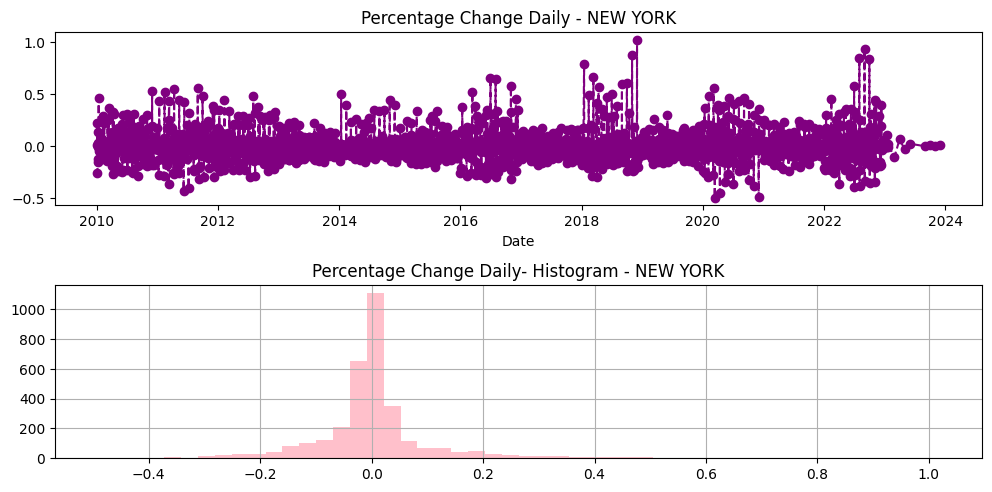

In [38]:
df_newyork['Daily Return'] = df_newyork['Adj Close'].pct_change()

fig, ax = plt.subplots(nrows=2, ncols=1)
df_newyork['Daily Return'].plot(ax=ax[0], figsize=(10,5),linestyle='--', marker='o', color='purple')
ax[0].set_title('Percentage Change Daily - NEW YORK')
df_newyork['Daily Return'].hist(bins=50,figsize=(10,5),ax = ax[1], color='pink')
ax[1].set_title('Percentage Change Daily- Histogram - NEW YORK')

fig.tight_layout(pad = 1)

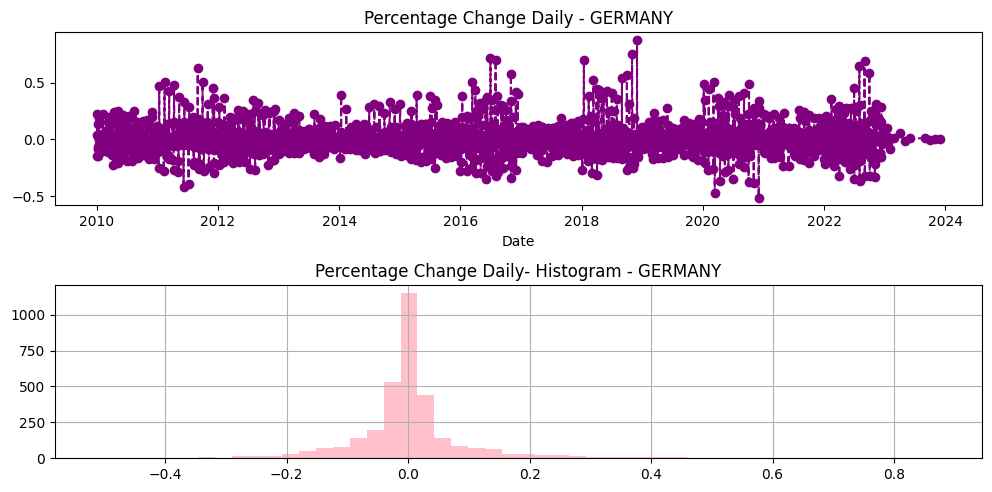

In [39]:
df_germany['Daily Return'] = df_germany['Adj Close'].pct_change()

fig, ax = plt.subplots(nrows=2, ncols=1)
df_germany['Daily Return'].plot(ax=ax[0], figsize=(10,5),linestyle='--', marker='o', color='purple')
ax[0].set_title('Percentage Change Daily - GERMANY')
df_germany['Daily Return'].hist(bins=50,figsize=(10,5),ax = ax[1], color='pink')
ax[1].set_title('Percentage Change Daily- Histogram - GERMANY')

fig.tight_layout(pad = 1)

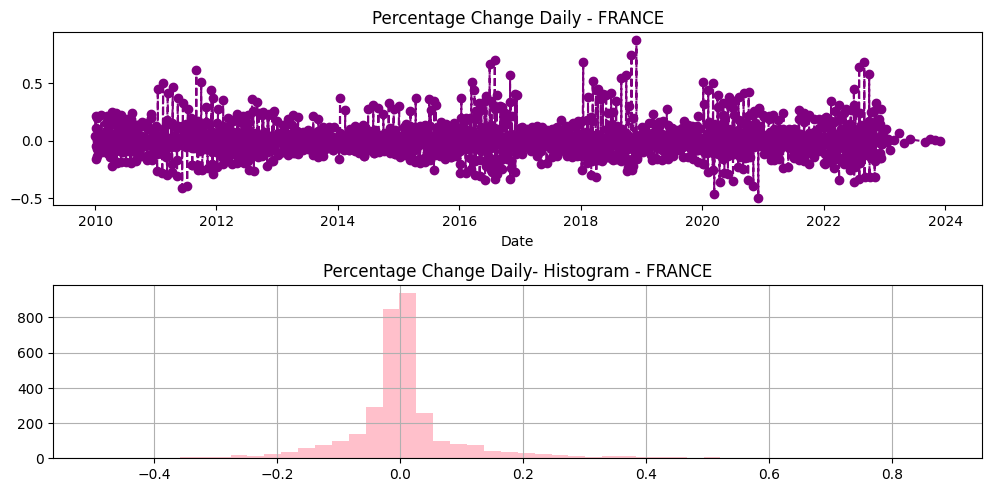

In [40]:
df_france['Daily Return'] = df_france['Adj Close'].pct_change()

fig, ax = plt.subplots(nrows=2, ncols=1)
df_france['Daily Return'].plot(ax=ax[0], figsize=(10,5),linestyle='--', marker='o', color='purple')
ax[0].set_title('Percentage Change Daily - FRANCE')
df_france['Daily Return'].hist(bins=50,figsize=(10,5),ax = ax[1], color='pink')
ax[1].set_title('Percentage Change Daily- Histogram - FRANCE')

fig.tight_layout(pad = 1)

# Close Price

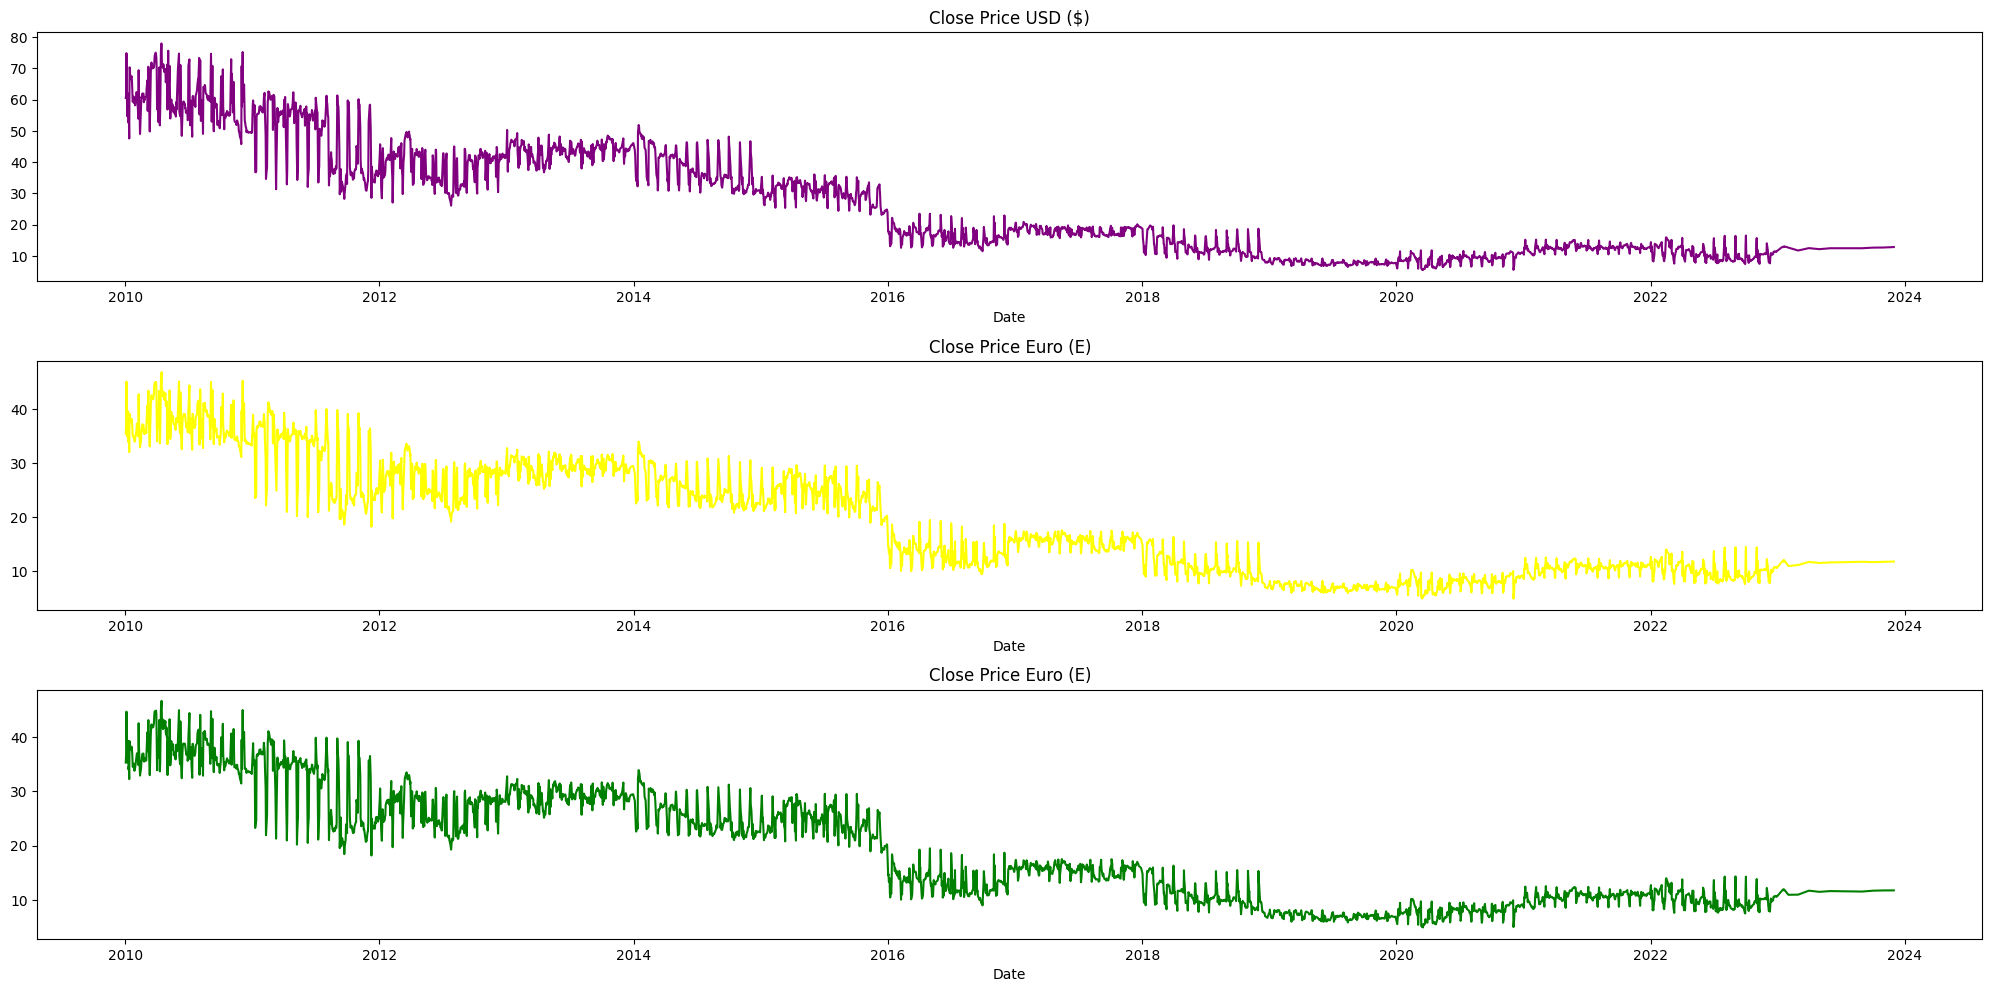

In [41]:
fig, ax = plt.subplots(nrows=3, ncols=1)
df_newyork['Close'].plot(ax=ax[0], figsize=(20,10), color='purple')
ax[0].set_title('Close Price USD ($)')
df_germany['Close'].plot(ax=ax[1], figsize=(20,10), color='yellow')
ax[1].set_title('Close Price Euro (E)')
df_france['Close'].plot(ax=ax[2], figsize=(20,10), color='Green')
ax[2].set_title('Close Price Euro (E)')
fig.tight_layout(pad = 1)

# Data Scaling for EQUITY- GERMANY

In [42]:
# Create a new dataframe with only the 'Close column 
data = df_germany.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

print(training_data_len, ' is the training length')

# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

3152  is the training length
[array([0.72786419, 0.76381018, 0.9578629 , 0.77369743, 0.71575906,
       0.82627662, 0.69021084, 0.71411052, 0.64707008, 0.81444867,
       0.81481837, 0.78044328, 0.78543316, 0.79356497, 0.77489895,
       0.75272141, 0.71631343, 0.71575906, 0.70661079, 0.69626136,
       0.69265754, 0.7042083 , 0.74625302, 0.77360521, 0.76861526,
       0.71677549, 0.90241921, 0.79596746, 0.71593341, 0.66833664,
       0.69977263, 0.72998957, 0.74782392, 0.75845063, 0.7695394 ,
       0.76695192, 0.73775161, 0.7442201 , 0.72684773, 0.74597564,
       0.73082123, 0.78968386, 0.85270477, 0.77905715, 0.91812828,
       0.80834987, 0.7035785 , 0.67177981, 0.85529215, 0.88024176,
       0.89779893, 0.88430767, 0.88227477, 0.88024176, 0.89317865,
       0.9090725 , 0.94344756, 0.95361219, 0.95324262, 0.95675405])]
[0.9380880365391021]

[array([0.72786419, 0.76381018, 0.9578629 , 0.77369743, 0.71575906,
       0.82627662, 0.69021084, 0.71411052, 0.64707008, 0.81444867,
       

# Model Creation for EQUITY- GERMANY

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1246/3092 [===========>..................] - ETA: 1:20 - loss: 0.0058

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price EUR', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Part of Model Plot for better understanding of Predictions ')
plt.xlabel('Date', fontsize=18);plt.ylabel('Close Price EURO', fontsize=18)
plt.xlim(pd.Timestamp('2022-04-04'), pd.Timestamp('2023-12-01'));plt.ylim(0,30)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

# Close Price Prediction for EQUITY- GERMANY

In [ ]:
# Show the valid and predicted prices
pd.set_option('display.max_rows', None)
valid

Varshini Gopal Mohanraj

M.Sc. Data Analytics